In [3]:
import pysd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
vensimDirectory='./Simulation Files/Prosumers & defectors'
vensimFile ='net metering-no fixed tariff.mdl'
filepath = Path(vensimDirectory,vensimFile)
model = pysd.read_vensim(str(filepath))
period_range=list(range(1,6))+list(range(6,36,6))

In [5]:
electricity ={p:model.run(params={'Tariff Correction Period':p}) for p in period_range}

In [6]:
iv =['Utility Energy Sale','Budget Deficit','Electricity Tariff','Regular Consumers']

In [7]:
tariff = pd.DataFrame()
sale = pd.DataFrame()
budget_deficit = pd.DataFrame()
for p in period_range:
    tariff[p]=electricity[p]['Electricity Tariff']
    budget_deficit[p]=electricity[p]['Budget Deficit']
    sale[p]=electricity[p]['Utility Energy Sale']



In [20]:
pd.DataFrame([tariff.max(),tariff.mean()])

,1,2,3,4,5,6,12,18,24,30
0,6.706424e+32,8.338753e+06,15.364966,0.373115,0.186771,0.173945,0.167814,0.168458,0.164326,0.165972
1,2.750842e+30,3.059102e+04,0.393050,0.161520,0.155593,0.155491,0.155279,0.155225,0.154910,0.155009


In [21]:
tariff.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 241 entries, 0.0 to 240.0
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       241 non-null    float64
 1   2       241 non-null    float64
 2   3       241 non-null    float64
 3   4       241 non-null    float64
 4   5       241 non-null    float64
 5   6       241 non-null    float64
 6   12      241 non-null    float64
 7   18      241 non-null    float64
 8   24      241 non-null    float64
 9   30      241 non-null    float64
dtypes: float64(10)
memory usage: 28.8 KB


<AxesSubplot:>

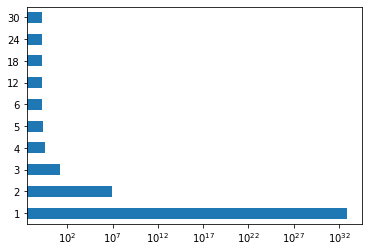

In [15]:
tariff.max().plot.barh(logx=True)

AxesSubplot(0.125,0.125;0.775x0.755)


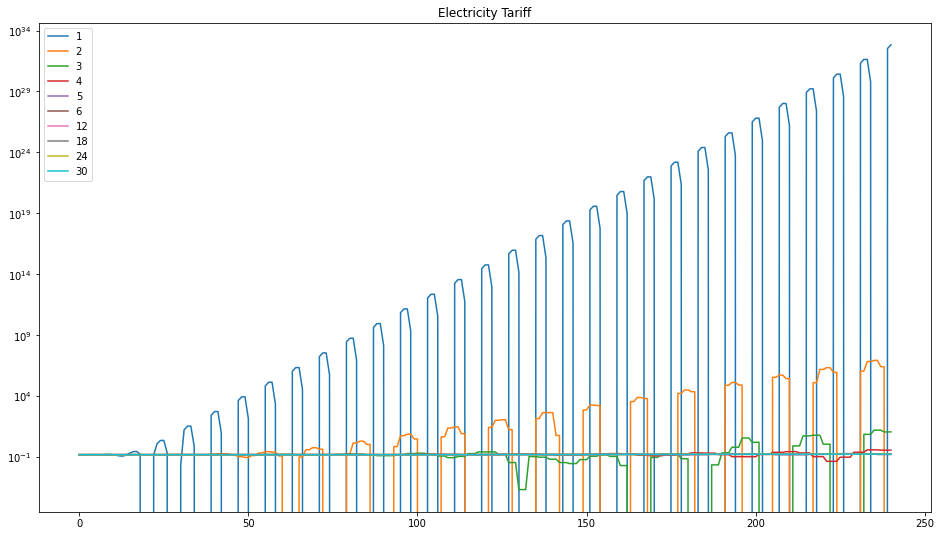

In [11]:
ax=tariff.plot(figsize=(16,9),title='Electricity Tariff',logy=True)


<AxesSubplot:title={'center':'Budget Deficit'}>

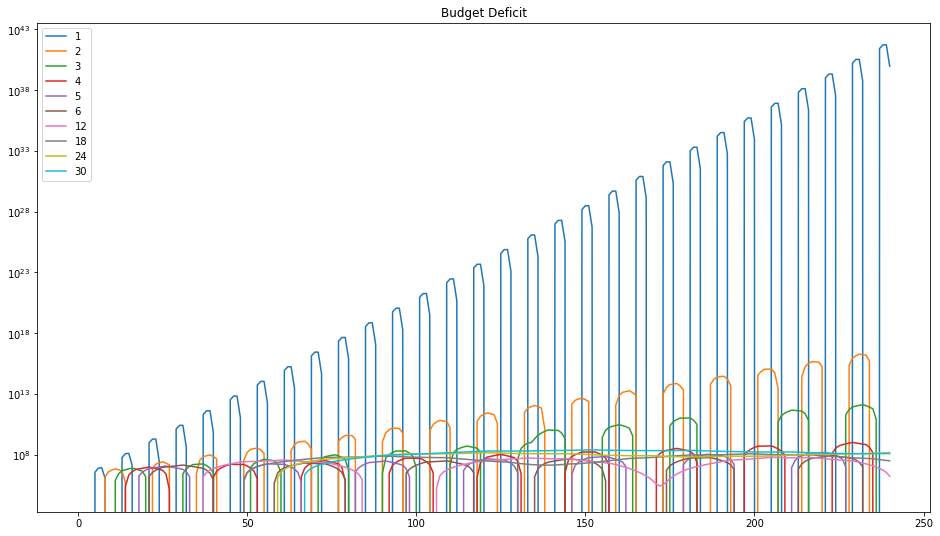

In [59]:
budget_deficit.plot(figsize=(16,9),title='Budget Deficit',logy=True)

<AxesSubplot:title={'center':'Utility Energy sale'}>

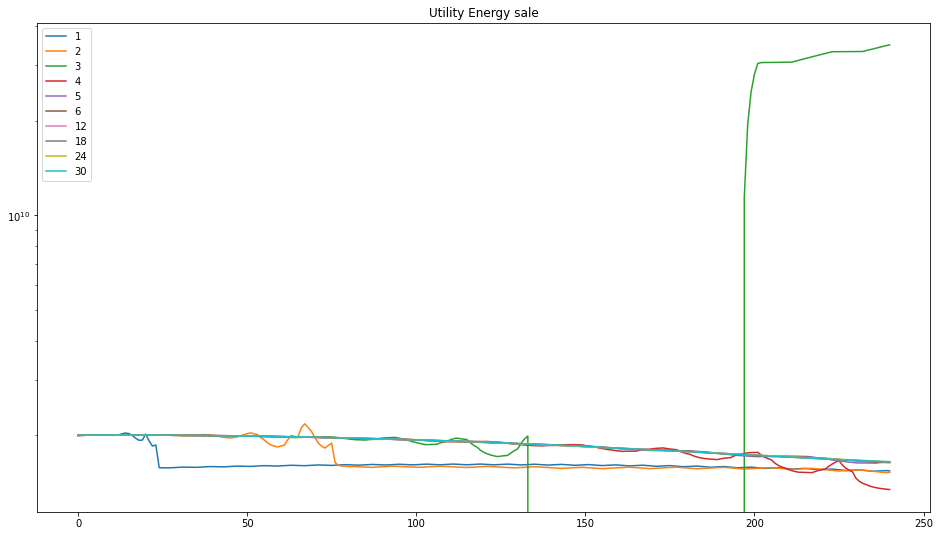

In [58]:
sale.plot(figsize=(16,9),title='Utility Energy sale',logy=True)

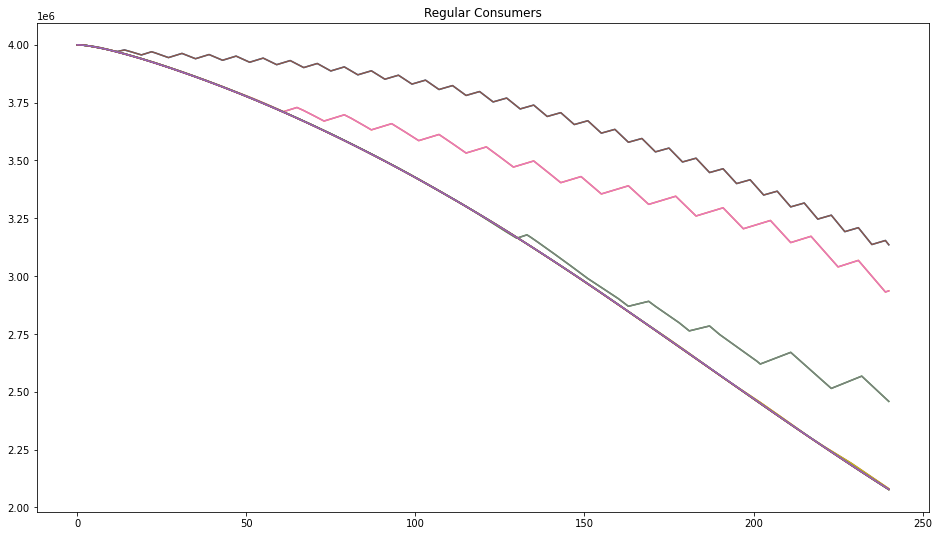

In [47]:
parameter ='Regular Consumers'
for p in period_range:
    electricity[p][parameter].plot(figsize=(16,9),title=parameter)


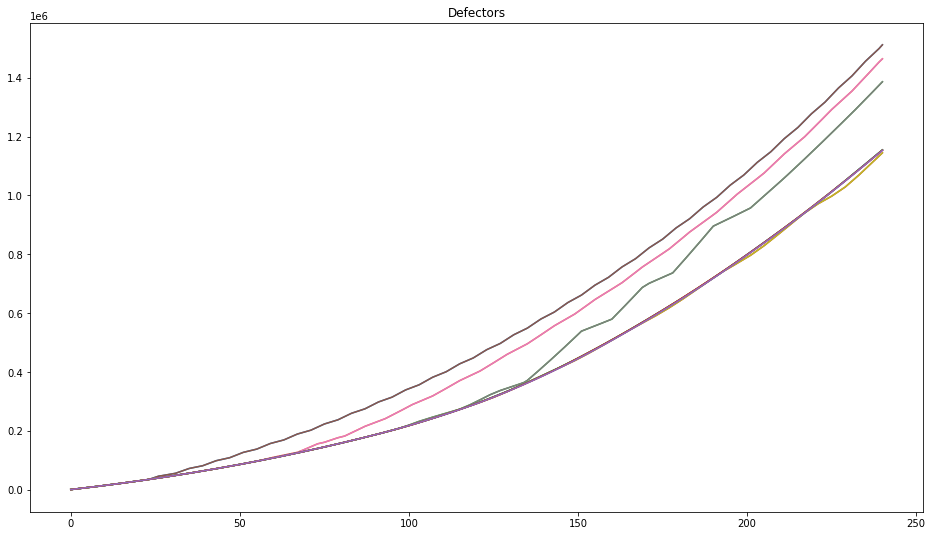

In [48]:
parameter ='Defectors'
for p in period_range:
    electricity[p][parameter].plot(figsize=(16,9),title=parameter)

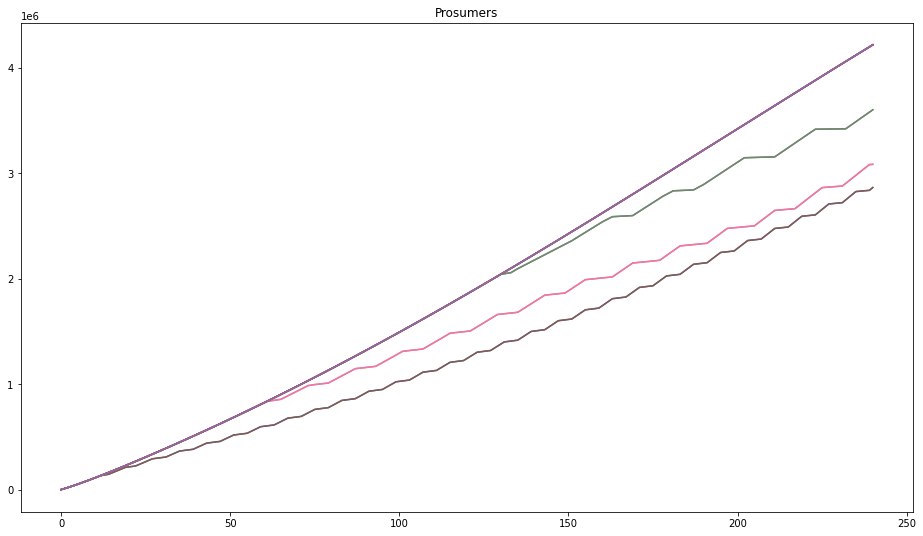

In [49]:
parameter ='Prosumers'
for p in period_range:
    electricity[p][parameter].plot(figsize=(16,9),title=parameter)

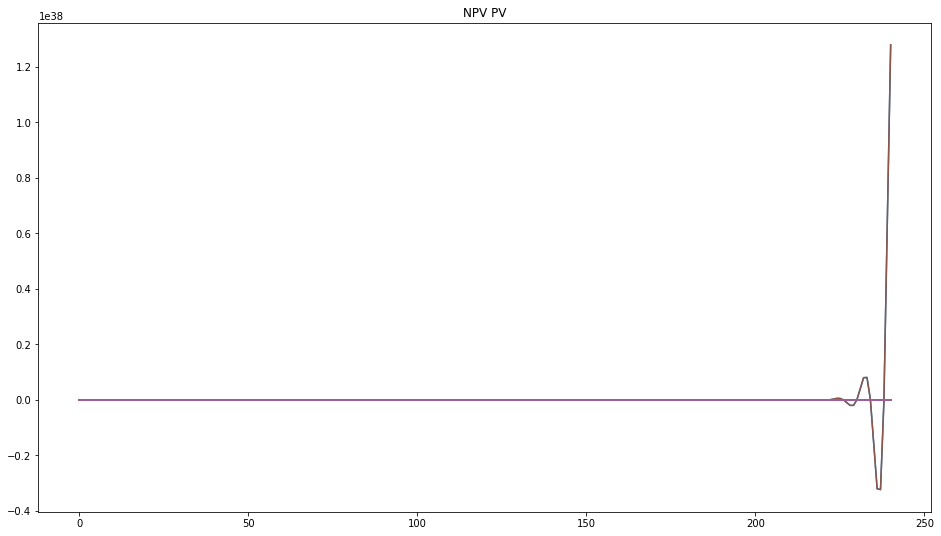

In [50]:
parameter ='NPV PV'
for p in period_range:
    electricity[p][parameter].plot(figsize=(16,9),title=parameter)

<AxesSubplot:>

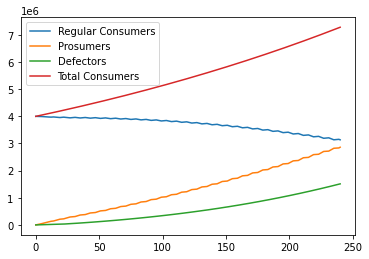

In [52]:
electricity[1].loc[:,['Regular Consumers','Prosumers','Defectors','Total Consumers']].plot()